# Classification by a Neural Network with Keras

## 1. Formulate or outline the problem:

### Goal: to predict the species of penguin using features from the public dataset

## 2. Identify inputs and outputs

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

## 3. Prepare Data

In [4]:
penguins['species'] = penguins['species'].astype('category')

In [5]:
penguins_filtered = penguins.drop(columns=["island", "sex"]).dropna()

In [6]:
penguins_features = penguins_filtered.drop(columns=['species'])

In [7]:
import pandas as pd

In [8]:
target = pd.get_dummies(penguins_filtered['species'])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(penguins_features, target, test_size=0.2, random_state=0, shuffle=True, stratify=target)

## 4. Build an architecture from scratch or choose a pretrained model

In [10]:
from tensorflow import keras

2022-12-06 09:32:43.869514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [12]:
inputs = keras.Input(shape=X_train.shape[1])

In [13]:
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)

2022-12-06 09:32:46.319902: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 09:32:46.322833: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)

In [15]:
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


## 5. Choose a loss function and optimizer

In [16]:
model.compile(loss = keras.losses.CategoricalCrossentropy(),optimizer = 'adam')

## 6. Train model

In [17]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 820.6429
Epoch 2/100
9/9 [==============================] - 0s 37ms/step - loss: 697.5318
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 609.1370
Epoch 4/100
9/9 [==============================] - 0s 32ms/step - loss: 579.1840
Epoch 5/100
9/9 [==============================] - 0s 43ms/step - loss: 547.1120
Epoch 6/100
9/9 [==============================] - 0s 45ms/step - loss: 519.7590
Epoch 7/100
9/9 [==============================] - 1s 69ms/step - loss: 496.0385
Epoch 8/100
9/9 [==============================] - 0s 52ms/step - loss: 470.9467
Epoch 9/100
9/9 [==============================] - 0s 32ms/step - loss: 447.3922
Epoch 10/100
9/9 [==============================] - 0s 28ms/step - loss: 423.5393
Epoch 11/100
9/9 [==============================] - 0s 20ms/step - loss: 398.2708
Epoch 12/100
9/9 [==============================] - 0s 40ms/step - loss: 374.4082
Epoch 13/100
9/9 [=======

<AxesSubplot:>

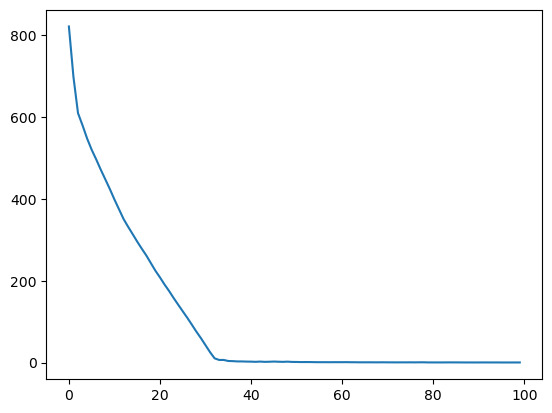

In [18]:
sns.lineplot(x=history.epoch, y=history.history['loss'])

## 7. Perform a prediction/classification

In [20]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame(y_pred, columns=target.columns)
prediction

3/3 [==============================] - 0s 12ms/step


,Adelie,Chinstrap,Gentoo
0,0.912190,0.013751,0.074059
1,0.882857,0.074007,0.043136
2,0.937605,0.022637,0.039758
3,0.164854,0.001824,0.833323
4,0.519199,0.479186,0.001615
...,...,...,...
64,0.700954,0.262584,0.036462
65,0.752485,0.056536,0.190979
66,0.295791,0.703398,0.000811
67,0.397050,0.005304,0.597646


In [21]:
predicted_species = prediction.idxmax(axis='columns')
predicted_species

0        Adelie
1        Adelie
2        Adelie
3        Gentoo
4        Adelie
        ...    
64       Adelie
65       Adelie
66    Chinstrap
67       Gentoo
68       Gentoo
Length: 69, dtype: object

## 8. Measure performance

In [22]:
from sklearn.metrics import confusion_matrix

true_species = y_test.idxmax(axis="columns")

matrix = confusion_matrix(true_species, predicted_species)
print(matrix)

[[30  0  0]
 [ 4 10  0]
 [ 2  0 23]]


<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

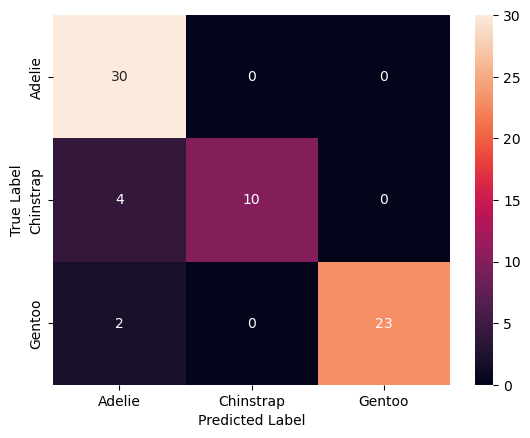

In [25]:
#convert to a pandas dataframe
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, columns=y_test.columns.values)

#Set the names of the x and y axis
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'

sns.heatmap(confusion_df, annot=True)

## 9. Tune the model/hyperparameters

Performance metric:

F1 Score = 2 * Precision * Recall/(Precision+Recall)

Precision = 'True Positives'/'True Positives' + 'False Positives'

Recall = 'True Positives'/'True Positives' + 'False Negatives'


In [29]:
P_adelie = 30/(30+6)
R_adelie = 30/(30+0)
F1_adelie = 2*P_adelie*R_adelie/(P_adelie+R_adelie)
F1_adelie

0.9090909090909091

## Save/share model

In [30]:
model.save('my_first_model')

INFO:tensorflow:Assets written to: my_first_model/assets


In [31]:
pretrained_model = keras.models.load_model('my_first_model')

In [32]:
y_pretrained_pred = pretrained_model.predict(X_test)
pretrained_prediction = pd.DataFrame(y_pretrained_pred, columns=target.columns.values)

3/3 [==============================] - 0s 18ms/step


In [33]:
pretrained_predicted_species = pretrained_prediction.idxmax(axis='columns')
pretrained_predicted_species

0        Adelie
1        Adelie
2        Adelie
3        Gentoo
4        Adelie
        ...    
64       Adelie
65       Adelie
66    Chinstrap
67       Gentoo
68       Gentoo
Length: 69, dtype: object